### Import the necessary program libraries

In [1]:
import pandas as pd
import plotly.graph_objects as go
from classes import KMeansClusterMain, BaseLoader
import plotly.express as px
from funcs import to_float, get_density, get_color
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.colors as mcolors
from sqlalchemy import create_engine
from settings import mariadb_string, mariadb_config

### Select the data

In [2]:
sql_query = """select 
	*
from
	stock_price s
where
	s.symbol = '{}'
group BY
	s.`date`
order by
	s.`date` asc;"""

loader = BaseLoader(mariadb_config, None)
symbol = loader.choose_id()
df_stock = pd.read_sql(sql_query.format(symbol), create_engine(mariadb_string))
df_stock.info()

Please choose the symbol from the index which data should be analysed.
symbol AMZN: Amazon
symbol BKNG: Booking Holdings
symbol DASH: DoorDash
symbol HD: Home Depot
symbol LOW: Lowe’s
symbol MCD: McDonald's
symbol NKE: Nike
symbol SBUX: Starbucks
symbol TJX: TJX Companies
symbol TSLA: Tesla
You can typ 'q' to quit.


symbol:  AMZN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6464 entries, 0 to 6463
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  6464 non-null   object 
 1   date    6464 non-null   object 
 2   open    6464 non-null   float64
 3   high    6464 non-null   float64
 4   low     6464 non-null   float64
 5   close   6464 non-null   float64
dtypes: float64(4), object(2)
memory usage: 303.1+ KB


In [6]:
df_stock.head()

,symbol,date,open,high,low,close,volatility_max,volatility_mean
0,AMZN,1999-11-01,68.06,71.88,66.31,69.13,NaN,NaN
1,AMZN,1999-11-02,69.75,70.00,65.06,66.44,NaN,NaN
2,AMZN,1999-11-03,68.19,68.50,65.00,65.81,NaN,NaN
3,AMZN,1999-11-04,67.19,67.19,61.00,63.06,NaN,NaN
4,AMZN,1999-11-05,64.75,65.50,62.25,64.94,NaN,NaN


### Prepare the data and make some cleaning

In [7]:
df_stock["date"] = pd.to_datetime(df_stock["date"])

# Volatility Calculation
df_stock['volatility_max'] = (df_stock['high'] - df_stock['low']).rolling(21).max()
df_stock['volatility_mean'] = (df_stock['high'] - df_stock['low']).rolling(21).mean()

In [8]:
df_stock.head()

,symbol,date,open,high,low,close,volatility_max,volatility_mean
0,AMZN,1999-11-01,68.06,71.88,66.31,69.13,NaN,NaN
1,AMZN,1999-11-02,69.75,70.00,65.06,66.44,NaN,NaN
2,AMZN,1999-11-03,68.19,68.50,65.00,65.81,NaN,NaN
3,AMZN,1999-11-04,67.19,67.19,61.00,63.06,NaN,NaN
4,AMZN,1999-11-05,64.75,65.50,62.25,64.94,NaN,NaN


In [9]:
df_stock.tail()

,symbol,date,open,high,low,close,volatility_max,volatility_mean
6459,AMZN,2025-07-09,221.07,224.29,220.470,222.54,6.619,4.298762
6460,AMZN,2025-07-10,221.52,222.79,219.700,222.26,6.619,4.209238
6461,AMZN,2025-07-11,223.46,226.68,222.370,225.02,6.619,4.245905
6462,AMZN,2025-07-14,225.02,226.66,224.240,225.69,6.619,4.098762
6463,AMZN,2025-07-15,226.01,227.27,225.455,226.35,6.619,4.078048


### The Mean Volatility for the cut off the timeframe 

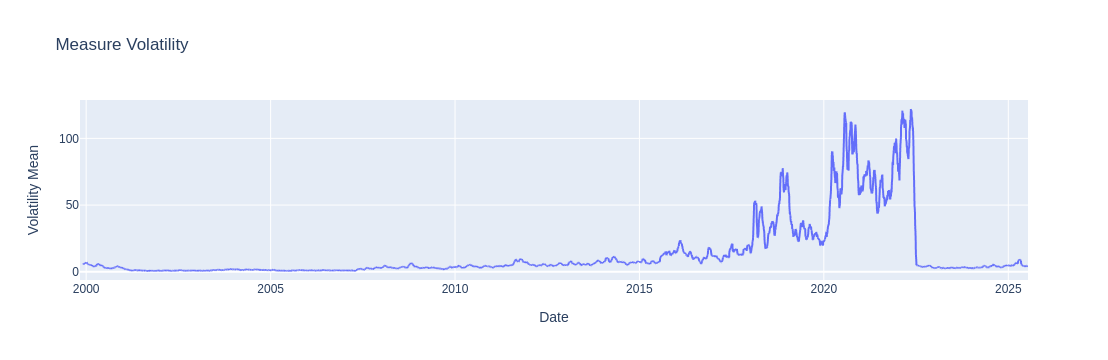

In [10]:
fig = px.line(df_stock, x="date", y="volatility_mean", title="Measure Volatility", 
              labels={"date": "Date", "volatility_mean": "Volatility Mean"})
fig.show()

### The Max Volatility for the entry into the market

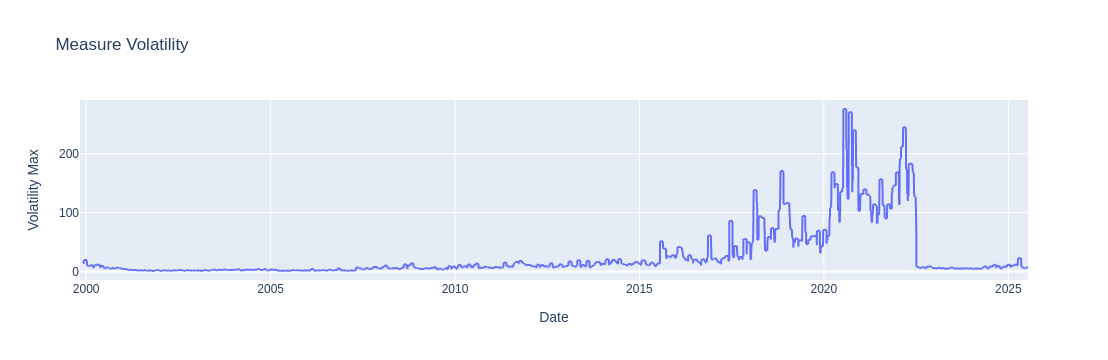

In [11]:
fig = px.line(df_stock, x="date", y="volatility_max", title="Measure Volatility",
              labels={"date": "Date", "volatility_max": "Volatility Max"})
fig.show()

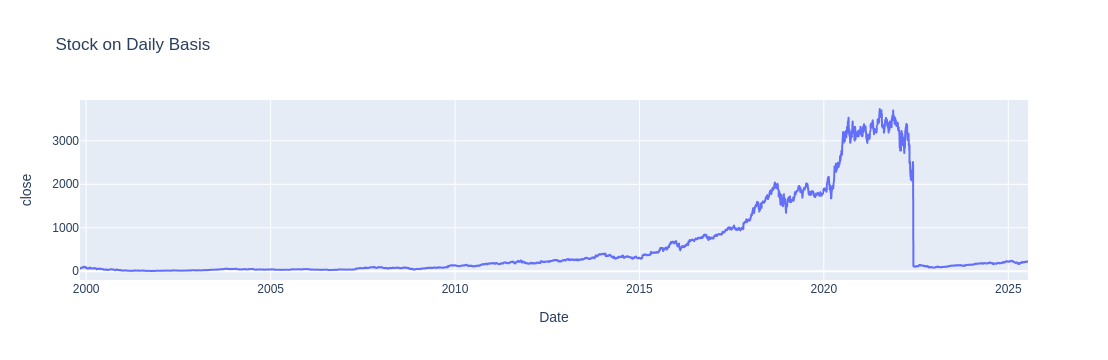

In [13]:
fig = px.line(df_stock, x="date", y="close", title="Stock on Daily Basis", 
              labels={"date": "Date", "density": "Cluster Aufsummierung"})

fig.show()

     symbol       date     open    high     low   close  volatility_max  \
5685   AMZN 2022-06-06  125.245  128.99  123.81  124.79         167.505   
5686   AMZN 2022-06-07  122.005  124.10  120.63  123.00         167.505   
5687   AMZN 2022-06-08  122.610  123.75  120.75  121.18         167.505   
5688   AMZN 2022-06-09  119.990  121.30  116.10  116.15         167.505   
5689   AMZN 2022-06-10  113.415  114.50  109.05  109.65         167.505   

      volatility_mean  
5685        96.976095  
5686        91.456333  
5687        85.843952  
5688        80.880619  
5689        75.685381  
     symbol       date    open    high      low   close  volatility_max  \
6459   AMZN 2025-07-09  221.07  224.29  220.470  222.54           6.619   
6460   AMZN 2025-07-10  221.52  222.79  219.700  222.26           6.619   
6461   AMZN 2025-07-11  223.46  226.68  222.370  225.02           6.619   
6462   AMZN 2025-07-14  225.02  226.66  224.240  225.69           6.619   
6463   AMZN 2025-07-15  226.01

### Truncate the timeframe

In [18]:
# Select the timestamp
time_stamp = '2022-06-06'
symbol = df_stock.loc[0, "symbol"]
delete_string = f"DELETE FROM stock_price WHERE symbol='{symbol}' AND `date`<'{time_stamp}';"

# Truncate the data
df_stock = df_stock[df_stock['date'] >= time_stamp]
affected_rows = loader.data_connection.query(delete_string)
print(df_stock.head())
print(df_stock.tail())
print("Affected Rows:", affected_rows)

# Hier stehen geblieben

AttributeError: 'BaseLoader' object has no attribute 'query'

### Compute the main process

1. Calculate the percentage change on daily bases

2. Within the percentage change datapoints calculate the clusters with the help of the KMeans-Clustering-Algorithm

3. Calculate the necessary density column with the cluster labels and sum up the kmeans centroids with that and save them

In [12]:
# Compute the percentage change
df_stock["perc_change"] = df_stock["Zuletzt"].pct_change()
df_stock.dropna(inplace=True)
df_stock = df_stock[df_stock['perc_change'] != 0.0]

# Here comes KMeans
datapoints = df_stock["perc_change"].to_list()
kmeans = KMeansClusterMain(3)
kmeans.fit(datapoints) 

# Assign the clusters
df_stock["cluster"] = kmeans.labels
df_stock["cluster"] = pd.to_numeric(df_stock["cluster"])

# Get the density for the colormap
df_stock["density"] = df_stock["cluster"].rolling(21).apply(get_density, kwargs={'orig_density': kmeans.centroids})

# cluster_str needed for kmeans volatility cluster graph.
df_stock["cluster_str"] = df_stock.cluster.astype(str)
df_stock['perc_change'] = df_stock['perc_change'] * 100

print(df_stock.isna().any())
print(df_stock.info())

Datum              False
Zuletzt            False
Eröffn.            False
Hoch               False
Tief               False
volatility_max     False
volatility_mean    False
perc_change        False
cluster            False
density             True
cluster_str        False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 1336 to 2643
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datum            1305 non-null   datetime64[ns]
 1   Zuletzt          1305 non-null   float64       
 2   Eröffn.          1305 non-null   float64       
 3   Hoch             1305 non-null   float64       
 4   Tief             1305 non-null   float64       
 5   volatility_max   1305 non-null   float64       
 6   volatility_mean  1305 non-null   float64       
 7   perc_change      1305 non-null   float64       
 8   cluster          1305 non-null   int64         
 9   density          128

### Need it for further processing of the boundaries and the coloring

In [13]:
describe_ser = df_stock["density"].describe()
upper_limit = describe_ser["mean"] + (describe_ser["std"] * 2)
lower_limit = describe_ser["mean"] - (describe_ser["std"] * 2)
print(describe_ser)

count    1285.000000
mean        0.043112
std         0.175673
min        -0.482962
25%        -0.075690
50%         0.030720
75%         0.154548
max         0.509091
Name: density, dtype: float64


### Checking the volatility in percentage daily changes

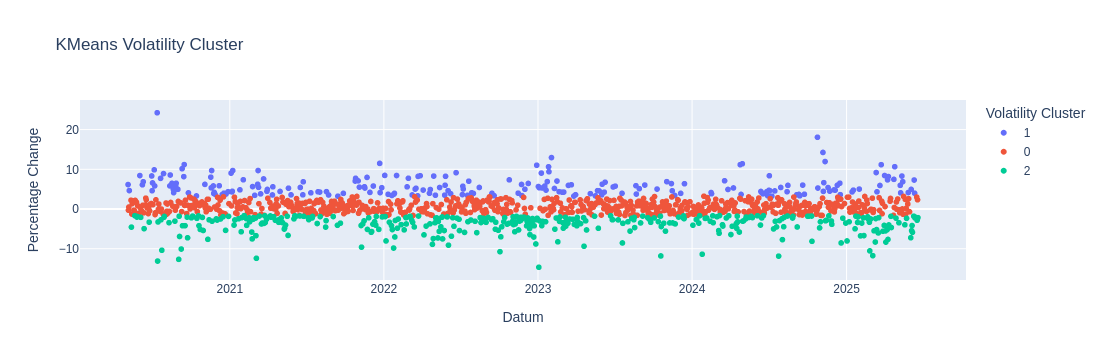

In [14]:
fig = px.scatter(df_stock, x="Datum", y="perc_change", color="cluster_str", 
                 title="KMeans Volatility Cluster", 
                 labels={"date": "Date", "perc_change": "Percentage Change", 
                         "cluster_str": "Volatility Cluster",})
fig.show()

In [15]:
# Need it for the sell order
df_stock.loc[df_stock['cluster'] == 1]['perc_change'].describe()


count    225.000000
mean       5.897898
std        2.594733
min        3.235294
25%        4.129754
50%        5.288821
75%        6.882169
max       24.241329
Name: perc_change, dtype: float64

### Show the boundaries

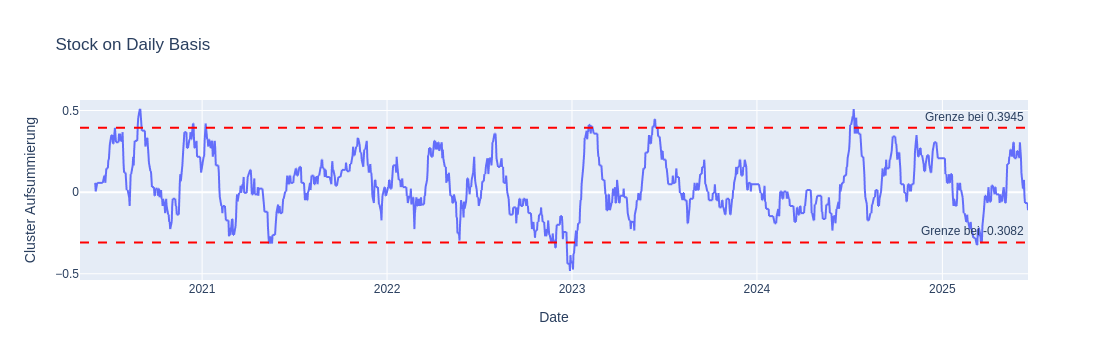

In [16]:
fig = px.line(df_stock, x="Datum", y="density", title="Stock on Daily Basis",
                  labels={"Datum": "Date", "density": "Cluster Aufsummierung"})

fig.add_hline(y=upper_limit, line_dash="dash", line_color="red", annotation_text=f"Grenze bei {round(upper_limit,4)}")
fig.add_hline(y=lower_limit, line_dash="dash", line_color="red", annotation_text=f"Grenze bei {round(lower_limit,4)}")


fig.show()

### Color the price history according to the column density

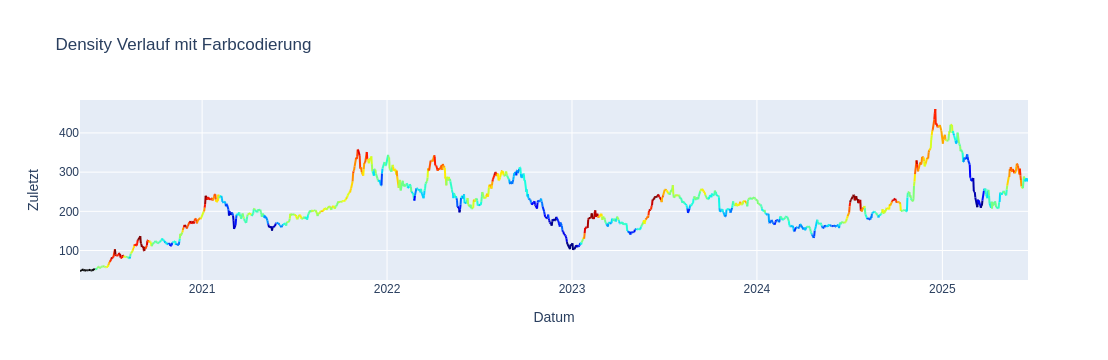

Untere Grenze (vmin): -0.31
Obere Grenze (vmax): 0.39
Mittelwert: 0.04


In [17]:
# Statistical limits for clipping
vmin = lower_limit
vmax = upper_limit

# Create normalization
norm = Normalize(vmin=vmin, vmax=vmax, clip=True)

# Create plotly-figure
fig = go.Figure()

# Draw line segments with colors based on density
for i in range(len(df_stock) - 1):
    density_value = df_stock["density"].iloc[i]
    color = get_color(density_value, norm)
    
    fig.add_trace(go.Scatter(
        x=df_stock["Datum"].iloc[i:i+2],  # Zwei Punkte verbinden
        y=df_stock["Zuletzt"].iloc[i:i+2],
        mode="lines",
        line=dict(color=color, width=2),
        showlegend=False,
    ))

# Adjust layout
fig.update_layout(
    title="Density Verlauf mit Farbcodierung",
    xaxis_title="Datum",
    yaxis_title="Zuletzt",
    # Add colorbar
    coloraxis=dict(
        colorbar=dict(
            title="Density",
            ticktext=["Niedrig (Blau)", "Neutral (Grün)", "Hoch (Rot)"],
            tickvals=[vmin, (vmin+vmax)/2, vmax]
        ),
        colorscale="jet",
        cmin=vmin,
        cmax=vmax
    )
)

fig.show()

# Optional: Ausgabe der Grenzwerte zur Kontrolle
print(f"Untere Grenze (vmin): {vmin:.2f}")
print(f"Obere Grenze (vmax): {vmax:.2f}")
print(f"Mittelwert: {describe_ser['mean']:.2f}")